In [1]:
from RADAR_set_up import *

import pandas as pd
import matplotlib.pyplot as plt

import regex as re
import numpy as np

/home/nicole/miniconda3/envs/radar_env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


detector and tokeniser successfully loaded


#### Setup RADAR + Helper Functions

In [2]:
%run RADAR_set_up.py

detector and tokeniser successfully loaded


#### Read Data

In [3]:
post_RADAR_data = pd.read_csv('topics-post-RADAR-data.csv')

#### Paragraph Distribution

In [4]:
print(post_RADAR_data['Student'][2])

The last decade has seen an increasing number of tourists travelling to visit natural wonder sights, ancient heritages and different cultures around the world. While some people might think that this international tourism has negative effects on the destination countries, I would contend that it has contributed to the economic development as well as preserved the culture and environment of the tourist destinations. 
 Firstly, international tourism promotes many aspects of the destination countryâs economy in order to serve various demands of tourists. Take Cambodia for example, a large number of visitors coming to visit the Angkowat ancient temple need services like restaurants, hotels, souvenir shops and other stores. These demands trigger related business in the surrounding settings which in turn create many jobs for local people improve infrastructure and living standard. Therefore tourism has clearly improved lives in the tourist country.
 Secondly, through tourism industry, many

In [5]:
STUD_paragraph_counts = []

for text in post_RADAR_data['Student']:
    text = text.strip('/n')
    STUD_paragraph_counts.append(text.count('\n')); 

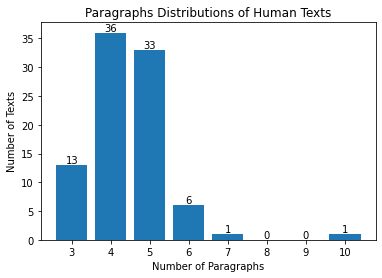

In [6]:
x = [i for i in range(3,11)]
y = [STUD_paragraph_counts.count(i) for i in range(3,11)]
f = plt.bar(x, y)

plt.title('Paragraphs Distributions of Human Texts')
plt.xlabel('Number of Paragraphs')
plt.ylabel('Number of Texts')

for i in range(len(x)):
    plt.text(x[i], y[i], str(y[i]), ha='center', va='bottom')

In [7]:
for index, text in enumerate(post_RADAR_data['Student']):
    if(text.count('\n') > 3 and text.count('\n') < 5):
        print(index, text)

5 More than 1.6 billion people in the world are either overweight or obese and United States has the highest rate of obesity. America's number one killer is cardiovascular diseases, which can easily be prevented by exercising. Exercise not only reduces the risk of health problems and various diseases, but it also has an effect on overall appearance. It is proven that exercising and being active can improve self-esteem and confidence. Excerising is one of the most important things in life and it can even be fun. It is a crucial element for living a healthier, longer, and happier life. 
 The number one reason why people should exercise is because it will keep you healthy. Americans are eating enormous amounts of fast foods these days, so cardiovascular diseases are becoming more and more common. One out of every four Americans are suffering from some form of cardiovascular diseases, which results in more than forty-five percent of deaths annually. The main cause for this condition is obe

#### Making DF for Text Length Exploration

In [8]:
post_RADAR_data.head(1)

,id,File,Topic,Student,Student_Reformatted,Grammarly_Score,STUD_Grammarly_Red,STUD_Grammarly_All,ChatGPT-3,ChatGPT-4,...,STUD_REFORMATTED,STUD_RED_RADAR,STUD_ALL_RADAR,GPT3_RADAR,GPT4_RADAR,GPT4_Quillbot_RADAR,GPT4_Grammarly_RADAR,GPT4_WordAI_RADAR,GPT4_Paraphrasing_IO_RAW_RADAR,GPT4_Paraphrasing_IO_EDITED_RADAR
0,0,essay01.txt,Should students be taught to compete or to coo...,It is always said that competition can effecti...,It is always said that competition can effecti...,75,It is always said that competition can effecti...,It is always said that competition can effecti...,Education is not only about acquiring knowledg...,Title: Fostering Cooperation and Competition i...,...,0.519651,0.712787,0.704968,0.986301,0.974493,0.975968,0.963674,0.843616,0.989108,0.983982


In [9]:
text_length_data = []
for text_index, text in enumerate(post_RADAR_data['Student']):
    text = text.strip('\n')
    paragraphs = text.split('\n')
    curr = ""
    for para_index, para in enumerate(paragraphs):
        curr = curr + '\n' + para
        text_length_data.append(
            {
                'text_id': text_index,
                'pre_processed_text' : curr.strip('\n'),
                'paragraph_id' : para_index,
                'word_count' : len(re.findall(r'\b\w+\b', curr)),
            }
        )
text_length_data = pd.DataFrame(text_length_data)


In [10]:
text_length_data.head(1)

,text_id,pre_processed_text,paragraph_id,word_count
0,0,It is always said that competition can effecti...,0,84


#### Getting RADAR Outputs

In [11]:
radarOutputs = [getRADARoutput(text) for text in text_length_data['pre_processed_text']]

KeyboardInterrupt: 

In [ ]:
text_length_data['RADAR_outputs'] = radarOutputs

In [ ]:
text_length_data.to_csv('topics-length-specific-RADAR.csv', index=False)